# Transportation - Deep Neural Network - Classification

In this project, we will focus transportation mode detection. It contains data about smarthphone sensors as people are using different modes of transportation. Each row represents a specific mode of transportation and the corresponding readings in the smartphone sensors (for that mode of transportation). This is a multiclass classification task: predict whether the mode of transportation based on a smartphone's sensor readings. Transportation mode prediction can provide context information to enhance applications and provide a better user experience. It can be crucial for many different applications, such as device profiling, monitoring road and traffic conditions, healthcare, travel support etc.

## Description of Variables

The description of variables are provided in "Transportation - Data Dictionary.docx"

## Goal

Use the **transportation.csv** data set and build a model to predict **target**. Build at least **three neural network models**.

# Read and Prepare the Data
## feature engineering: create one new variable from existing ones

In [164]:
# Insert as many cells as you need for data prep
# Common imports
import numpy as np
import pandas as pd

np.random.seed(42)

In [165]:
transportation = pd.read_csv("transportation.csv")
transportation.head()

,androidsensoraccelerometermean,androidsensoraccelerometermin,androidsensoraccelerometermax,androidsensoraccelerometerstd,androidsensorgyroscopemean,androidsensorgyroscopemin,androidsensorgyroscopemax,androidsensorgyroscopestd,soundmean,soundmin,soundmax,soundstd,target
0,9.701276,9.520186,9.826383,0.074273,0.021729,0.012970,0.033699,0.005727,88.111708,88.111708,88.111708,0.000000,Train
1,9.240731,6.927889,11.371441,1.157460,0.114340,0.018950,0.291155,0.071189,89.771860,89.771860,89.771860,0.008778,Bus
2,10.397750,8.649993,11.105722,0.614978,0.301824,0.260226,0.339794,0.021420,89.797764,89.797764,89.797764,0.039875,Car
3,10.197564,9.977808,10.417198,0.137675,0.017742,0.003502,0.039349,0.009800,89.746162,89.746162,89.746162,0.122969,Train
4,9.812239,8.290205,11.913782,1.016052,0.109497,0.005390,0.277880,0.070489,89.768758,89.768758,89.768758,1.023191,Bus


### Splitting data 

In [166]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(transportation, test_size=0.3)

In [167]:
train_set.isna().sum()

androidsensoraccelerometermean    0
androidsensoraccelerometermin     0
androidsensoraccelerometermax     0
androidsensoraccelerometerstd     0
androidsensorgyroscopemean        0
androidsensorgyroscopemin         0
androidsensorgyroscopemax         0
androidsensorgyroscopestd         0
soundmean                         0
soundmin                          0
soundmax                          0
soundstd                          0
target                            0
dtype: int64

In [168]:
test_set.isna().sum()

androidsensoraccelerometermean    0
androidsensoraccelerometermin     0
androidsensoraccelerometermax     0
androidsensoraccelerometerstd     0
androidsensorgyroscopemean        0
androidsensorgyroscopemin         0
androidsensorgyroscopemax         0
androidsensorgyroscopestd         0
soundmean                         0
soundmin                          0
soundmax                          0
soundstd                          0
target                            0
dtype: int64

### Data Prep

In [169]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import FunctionTransformer

In [170]:
train_target = train_set[['target']]
test_target = test_set[['target']]

train_inputs = train_set.drop(['target'], axis=1)
test_inputs = test_set.drop(['target'], axis=1)

<AxesSubplot:>

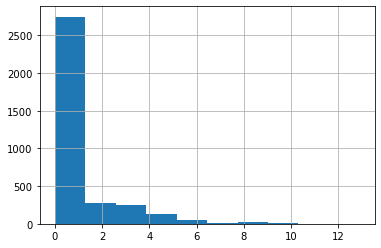

In [171]:
train_inputs['androidsensoraccelerometerstd'].hist()

In [172]:
from sklearn.preprocessing import PowerTransformer

PT = PowerTransformer(method = 'yeo-johnson', standardize=True)

In [173]:
transformed_accelerometer_std = PT.fit_transform(train_inputs[['androidsensoraccelerometerstd']])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

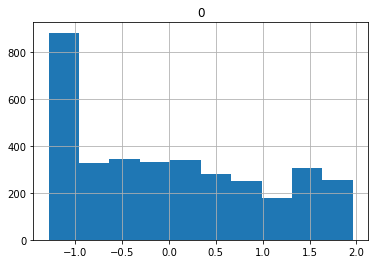

In [174]:
pd.DataFrame(transformed_accelerometer_std).hist()

In [175]:
train_inputs.dtypes

androidsensoraccelerometermean    float64
androidsensoraccelerometermin     float64
androidsensoraccelerometermax     float64
androidsensoraccelerometerstd     float64
androidsensorgyroscopemean        float64
androidsensorgyroscopemin         float64
androidsensorgyroscopemax         float64
androidsensorgyroscopestd         float64
soundmean                         float64
soundmin                          float64
soundmax                          float64
soundstd                          float64
dtype: object

### Pipeline

In [176]:
numeric_columns = train_inputs.select_dtypes(include=[np.number]).columns.to_list()

In [177]:
numeric_columns

['androidsensoraccelerometermean',
 'androidsensoraccelerometermin',
 'androidsensoraccelerometermax',
 'androidsensoraccelerometerstd',
 'androidsensorgyroscopemean',
 'androidsensorgyroscopemin',
 'androidsensorgyroscopemax',
 'androidsensorgyroscopestd',
 'soundmean',
 'soundmin',
 'soundmax',
 'soundstd']

In [178]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())])

In [179]:
transformed_columns = ['androidsensoraccelerometerstd']

In [180]:
my_new_column = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('powertransformer', PowerTransformer(method = 'yeo-johnson', standardize=True))])

In [181]:
preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_columns),
        #('cat', categorical_transformer, categorical_columns),
        #('binary', binary_transformer, binary_columns),
        ('trans', my_new_column, transformed_columns)],
        remainder='passthrough')


### Fit Transform

In [182]:
train_x = preprocessor.fit_transform(train_inputs)

train_x

array([[-1.74886686e-01,  2.77326456e-03, -5.99315610e-02, ...,
         5.25446848e-01,  6.62693768e-01,  5.41678868e-01],
       [ 5.30439796e+00, -3.81970427e+00,  9.68226289e+00, ...,
        -2.02531331e+00, -4.59510230e-01,  1.88802266e+00],
       [-6.89177749e-01,  5.48634204e-01, -4.96676441e-01, ...,
         7.45506062e-01, -4.51528627e-01, -9.05712731e-01],
       ...,
       [-4.34786689e-01,  6.01754279e-01, -4.54446532e-01, ...,
         2.65893332e-01,  3.06596409e-01, -7.57816604e-01],
       [ 4.54454105e-01, -2.35371258e+00,  2.48388209e+00, ...,
         7.48723847e-01, -3.77548557e-01,  1.76396303e+00],
       [-1.96270300e-01,  4.93180855e-01, -3.99497977e-01, ...,
         7.48741421e-01, -1.15978071e-01, -4.98842549e-01]])

In [183]:
train_x.shape

(3500, 13)

### Transform

In [184]:
test_x = preprocessor.transform(test_inputs)

test_x

array([[-0.32025512,  0.76100101, -0.4612405 , ..., -0.05407139,
        -0.45951023, -1.21586754],
       [-0.3753657 , -0.16063805, -0.20714456, ...,  0.50047109,
        -0.37680808,  0.33327539],
       [-1.01943413,  0.46313497, -0.5521988 , ..., -0.01864124,
        -0.45951023, -1.0559642 ],
       ...,
       [ 0.00412727,  0.87321484, -0.41794116, ...,  0.11887343,
         0.10361519, -1.21184649],
       [ 0.09581334,  0.91294408, -0.41518271, ...,  0.5263533 ,
        -0.41269376, -1.23335238],
       [-0.3038126 ,  0.70052755, -0.44874281, ..., -2.02531331,
        -0.45951023, -1.08532192]])

In [185]:
test_x.shape

(1500, 13)

### Keras needs Ordinal target values for classification 

In [186]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()

train_y = ord_enc.fit_transform(train_target)

train_y

array([[3.],
       [4.],
       [3.],
       ...,
       [3.],
       [4.],
       [0.]])

In [187]:
test_y = ord_enc.transform(test_target)

test_y.shape

(1500, 1)

## Baseline

In [188]:
train_target.value_counts()/len(train_target)

target 
Still      0.204286
Train      0.201429
Car        0.201143
Walking    0.197714
Bus        0.195429
dtype: float64

# Keras DNN model 1: Multiclass classification using Keras

In [189]:
import tensorflow as tf
from tensorflow import keras

# fix random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [190]:
# Make sure to try deep networks
train_x.shape

(3500, 13)

In [192]:
#Define the model: for multi-class

model1 = keras.models.Sequential()

model1.add(keras.layers.Input(shape=13))
model1.add(keras.layers.Dense(100, activation='relu'))
model1.add(keras.layers.Dense(100, activation='relu'))
model1.add(keras.layers.Dense(100, activation='relu'))

#final layer: there has to be 4 nodes with softmax (because we have 4 categories)
model1.add(keras.layers.Dense(5, activation='softmax'))


In [193]:
# Compile model

#Optimizer:
adam = keras.optimizers.Adam(lr=0.01)

model1.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

C:\Users\anush\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [194]:
# Fit the model

history = model1.fit(train_x, train_y, 
                    validation_data=(test_x, test_y), 
                    epochs=20, batch_size=500)

Epoch 1/20
7/7 [==============================] - 1s 60ms/step - loss: 1.2252 - accuracy: 0.4769 - val_loss: 1.0595 - val_accuracy: 0.5793
Epoch 2/20
7/7 [==============================] - 0s 13ms/step - loss: 0.9696 - accuracy: 0.6094 - val_loss: 0.9181 - val_accuracy: 0.6433
Epoch 3/20
7/7 [==============================] - 0s 11ms/step - loss: 0.8830 - accuracy: 0.6554 - val_loss: 0.8498 - val_accuracy: 0.6580
Epoch 4/20
7/7 [==============================] - 0s 11ms/step - loss: 0.8030 - accuracy: 0.6863 - val_loss: 0.8377 - val_accuracy: 0.6767
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.7773 - accuracy: 0.6903 - val_loss: 0.7663 - val_accuracy: 0.6953
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 0.7526 - accuracy: 0.6997 - val_loss: 0.7876 - val_accuracy: 0.6927
Epoch 7/20
7/7 [==============================] - 0s 11ms/step - loss: 0.7327 - accuracy: 0.7163 - val_loss: 0.7623 - val_accuracy: 0.6993
Epoch 8/20
7/7 [===========

In [195]:
# evaluate the model

scores = model1.evaluate(test_x, test_y, verbose=0)

scores

# In results, first is loss, second is accuracy

[0.6329088807106018, 0.7573333382606506]

In [196]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model1.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model1.metrics_names[1], scores[1]*100))

loss: 0.63
accuracy: 75.73%


# Keras DNN model 2: send two inputs to the last layer¶

In [197]:
# Make sure to try deep networks
# Select the first two columns: longitude and latitude
#(WHY: because lat and lon are good and important predictors)

lon_lat = train_x[:,:2]

lon_lat

array([[-1.74886686e-01,  2.77326456e-03],
       [ 5.30439796e+00, -3.81970427e+00],
       [-6.89177749e-01,  5.48634204e-01],
       ...,
       [-4.34786689e-01,  6.01754279e-01],
       [ 4.54454105e-01, -2.35371258e+00],
       [-1.96270300e-01,  4.93180855e-01]])

In [232]:
model2 = keras.models.Sequential()

input1 = keras.layers.Input(shape=2)
input2 = keras.layers.Input(shape=13)

hidden1 = keras.layers.Dense(100, activation='relu')(input2)
hidden2 = keras.layers.Dense(100, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(100, activation='relu')(hidden2)

concat = keras.layers.Concatenate()([input1, hidden3])

#final layer: there has to be 5 nodes with softmax (because we have 5 categories)
output = keras.layers.Dense(5, activation='softmax')(concat)

model2 = keras.Model(inputs =[input1, input2], outputs = output)

In [233]:
# Compile model

#Optimizer:
adam = keras.optimizers.Adam(lr=0.01)

model2.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

C:\Users\anush\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [238]:
# Fit the model

history = model2.fit((lon_lat, train_x), train_y, 
                    validation_data=((test_x[:,:2], test_x), test_y), 
                    epochs=50, batch_size=500)##20 epoch 77.80

Epoch 1/50
7/7 [==============================] - 0s 16ms/step - loss: 0.4262 - accuracy: 0.8317 - val_loss: 0.6103 - val_accuracy: 0.7793
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4205 - accuracy: 0.8297 - val_loss: 0.5876 - val_accuracy: 0.7873
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4000 - accuracy: 0.8411 - val_loss: 0.6260 - val_accuracy: 0.7840
Epoch 4/50
7/7 [==============================] - 0s 9ms/step - loss: 0.3948 - accuracy: 0.8449 - val_loss: 0.6854 - val_accuracy: 0.7767
Epoch 5/50
7/7 [==============================] - 0s 12ms/step - loss: 0.4063 - accuracy: 0.8391 - val_loss: 0.6182 - val_accuracy: 0.7980
Epoch 6/50
7/7 [==============================] - 0s 10ms/step - loss: 0.4310 - accuracy: 0.8331 - val_loss: 0.6927 - val_accuracy: 0.7740
Epoch 7/50
7/7 [==============================] - 0s 8ms/step - loss: 0.4228 - accuracy: 0.8409 - val_loss: 0.6657 - val_accuracy: 0.7600
Epoch 8/50
7/7 [===============

In [239]:
# evaluate the model

scores = model2.evaluate((test_x[:,:2], test_x), test_y, verbose=0)

scores

# In results, first is loss, second is accuracy

[0.7537256479263306, 0.7993333339691162]

In [240]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model2.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))

loss: 0.75
accuracy: 79.93%


# Optimizers, Learning rate, Dropout, Initialization & Activation functions 

In [204]:
#Define the model: for multi-class


#Set the learning rate:
lr=0.001


#Available optimizers:
adagrad = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
sgd = keras.optimizers.SGD(lr=lr, momentum=0.0, decay=0.0, nesterov=False)
rmsprop = keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
adam = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
nesterov_adam = keras.optimizers.Nadam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

#Initializations:
xavier = keras.initializers.glorot_normal(seed=None)
he = keras.initializers.he_normal(seed=None)


# Activation functions. Uncomment only one
#activation = 'elu' 
activation = 'relu'
#activation = 'tanh'
#activation = 'sigmoid'



#See the droput layers below:
input1 = keras.layers.Input(shape=13)

hidden1 = keras.layers.Dense(100, activation=activation, kernel_initializer=xavier)(input1)
drop1   = keras.layers.Dropout(0.2)(hidden1)
hidden2 = keras.layers.Dense(100, activation=activation, kernel_initializer=xavier)(drop1)
drop2   = keras.layers.Dropout(0.2)(hidden2)
hidden3 = keras.layers.Dense(100, activation=activation, kernel_initializer=xavier)(drop2)

#final layer: there has to be 4 nodes with softmax (because we have 4 categories)
output = keras.layers.Dense(5, activation='softmax')(hidden3)

#Compile"
model3 = keras.Model(inputs = input1, outputs = output)

model3.compile(loss='sparse_categorical_crossentropy', 
              optimizer=nesterov_adam, metrics=['accuracy'])

In [205]:
# Fit the model

history = model3.fit(train_x, train_y, 
                    validation_data=(test_x, test_y), 
                    epochs=50, batch_size=500)


Epoch 1/50
7/7 [==============================] - 2s 41ms/step - loss: 1.5121 - accuracy: 0.2780 - val_loss: 1.3818 - val_accuracy: 0.4813
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 1.3536 - accuracy: 0.4540 - val_loss: 1.2463 - val_accuracy: 0.5267
Epoch 3/50
7/7 [==============================] - 0s 10ms/step - loss: 1.2299 - accuracy: 0.5211 - val_loss: 1.1423 - val_accuracy: 0.5560
Epoch 4/50
7/7 [==============================] - 0s 12ms/step - loss: 1.1381 - accuracy: 0.5543 - val_loss: 1.0649 - val_accuracy: 0.5987
Epoch 5/50
7/7 [==============================] - 0s 10ms/step - loss: 1.0718 - accuracy: 0.5786 - val_loss: 1.0180 - val_accuracy: 0.6113
Epoch 6/50
7/7 [==============================] - 0s 9ms/step - loss: 1.0308 - accuracy: 0.5914 - val_loss: 0.9848 - val_accuracy: 0.6207
Epoch 7/50
7/7 [==============================] - 0s 9ms/step - loss: 1.0028 - accuracy: 0.5963 - val_loss: 0.9666 - val_accuracy: 0.6247
Epoch 8/50
7/7 [==============

In [206]:
# evaluate the model

scores = model3.evaluate(test_x, test_y, verbose=0)

scores

# In results, first is loss, second is accuracy

[0.6944723129272461, 0.7473333477973938]

In [207]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model3.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))


loss: 0.69
accuracy: 74.73%


# Early stopping based on validation results

In [222]:
from tensorflow.keras.callbacks import EarlyStopping


earlystop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

callback = [earlystop]

model3.fit(train_x, train_y, validation_data=(test_x, test_y), 
          epochs=100, batch_size=500, callbacks=callback)

Epoch 1/100
7/7 [==============================] - 0s 17ms/step - loss: 0.5474 - accuracy: 0.7849 - val_loss: 0.5661 - val_accuracy: 0.7893
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5577 - accuracy: 0.7874 - val_loss: 0.5688 - val_accuracy: 0.7880
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.5653 - accuracy: 0.7726 - val_loss: 0.5735 - val_accuracy: 0.7853
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5552 - accuracy: 0.7849 - val_loss: 0.5704 - val_accuracy: 0.7887
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.5575 - accuracy: 0.7823 - val_loss: 0.5712 - val_accuracy: 0.7787
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 0.5468 - accuracy: 0.7934 - val_loss: 0.5718 - val_accuracy: 0.7847
Epoch 00006: early stopping


In [223]:
# evaluate the model

scores = model3.evaluate(test_x, test_y, verbose=0)

scores

# In results, first is loss, second is accuracy

[0.5717679262161255, 0.7846666574478149]

In [224]:
# extract the accuracy from model.evaluate

print("%s: %.2f" % (model3.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model3.metrics_names[1], scores[1]*100))


loss: 0.57
accuracy: 78.47%


# MLPClassifier (one model for comparison purposes)

In [225]:
from sklearn.neural_network import MLPClassifier

In [226]:
dnn_clf = MLPClassifier(hidden_layer_sizes=(50,25,10),
                       max_iter=1000,alpha=0.01,activation='relu')

dnn_clf.fit(train_x, train_y)

C:\Users\anush\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPClassifier(alpha=0.01, hidden_layer_sizes=(50, 25, 10), max_iter=1000)

In [227]:
#Let's check the number of iterations:
dnn_clf.n_iter_

400

In [228]:
dnn_clf.n_layers_

5

In [229]:
from sklearn.metrics import accuracy_score

In [230]:
train_y_pred = dnn_clf.predict(train_x)

#Train accuracy
accuracy_score(train_y, train_y_pred)

0.8514285714285714

In [231]:
#Predict the test values
test_y_pred = dnn_clf.predict(test_x)

#Test accuracy
accuracy_score(test_y, test_y_pred)

0.7786666666666666

# Discussion
 
1) Which model performs the best (and why)?<br>
2) What is the baseline value? <br>
3) Does the best model perform better than the baseline (and why)?<br>
4) Does the best model exhibit any overfitting; what did you do about it?

# Extra Credit

In [280]:
import pandas as pd
import numpy as np
transport_competition = pd.read_csv("transportation-competition.csv")
transport_competition=transport_competition.drop(['ID'],axis=1)

In [281]:
PT = PowerTransformer(method = 'yeo-johnson', standardize=True)

In [282]:
trashnsformed_accelerometer_std = PT.fit_transform(transport_competition[['androidsensoraccelerometerstd']])

In [283]:
numeric_transformer = Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())])

In [284]:
transformed_columns = ['androidsensoraccelerometerstd']

In [285]:
test_transport = preprocessor.transform(transport_competition)

test_transport

array([[-1.11340742, -1.10208614,  0.03973181, ...,  0.75157335,
        -0.4471103 ,  1.28979332],
       [ 0.24627598,  0.96023967, -0.39312736, ...,  0.58314683,
        -0.14934129, -1.2002517 ],
       [-0.83122784,  0.43434407, -0.47792899, ...,  0.19075173,
        -0.40923312, -0.58731051],
       ...,
       [ 0.46036902, -1.71488915,  1.33062367, ..., -0.19432267,
         0.74625856,  1.56682992],
       [-0.26987097,  0.78066728, -0.46280232, ..., -2.02531331,
        -0.45951023, -1.2558575 ],
       [-0.24593676,  0.48256611, -0.33302725, ...,  0.75061524,
        -0.33824822, -0.32498455]])

In [286]:
test_transport.shape

(893, 13)

In [287]:
from keras.models import Sequential

In [304]:

bestprediction = model2.predict((test_transport[:,:2], test_transport))

In [305]:
output=np.argmax(bestprediction,axis=1)

In [306]:
#output1=np.argmax(output,axis=1)
output

array([4, 3, 0, 1, 2, 1, 0, 0, 2, 2, 1, 0, 2, 2, 1, 3, 0, 0, 3, 1, 2, 2,
       2, 4, 1, 1, 2, 1, 2, 4, 1, 0, 2, 0, 4, 2, 0, 1, 4, 0, 0, 1, 1, 0,
       3, 1, 0, 0, 3, 1, 3, 3, 3, 1, 3, 0, 2, 4, 3, 0, 1, 0, 4, 2, 4, 2,
       3, 3, 2, 2, 3, 1, 3, 1, 4, 2, 0, 1, 2, 0, 4, 1, 1, 2, 4, 2, 0, 1,
       2, 1, 4, 2, 3, 4, 1, 1, 0, 0, 0, 4, 4, 2, 4, 0, 1, 0, 4, 2, 3, 3,
       1, 3, 3, 0, 4, 2, 1, 4, 4, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 0, 2,
       0, 2, 0, 4, 3, 4, 0, 0, 4, 1, 0, 2, 3, 3, 3, 3, 3, 1, 2, 0, 0, 2,
       0, 1, 1, 2, 0, 4, 0, 4, 3, 3, 4, 0, 2, 0, 0, 2, 4, 0, 4, 4, 1, 4,
       2, 0, 0, 2, 3, 3, 3, 0, 4, 2, 1, 4, 1, 1, 3, 4, 4, 3, 2, 0, 2, 2,
       4, 0, 3, 0, 4, 4, 3, 2, 4, 2, 3, 3, 4, 1, 3, 1, 3, 0, 1, 2, 4, 3,
       1, 3, 2, 0, 2, 4, 1, 1, 4, 3, 1, 4, 2, 1, 3, 4, 0, 0, 2, 0, 4, 2,
       0, 3, 2, 3, 0, 2, 2, 1, 4, 3, 1, 0, 4, 1, 2, 2, 3, 1, 2, 3, 1, 2,
       1, 4, 0, 0, 1, 3, 2, 4, 2, 1, 2, 4, 0, 0, 0, 1, 0, 4, 1, 2, 1, 4,
       1, 4, 2, 3, 0, 4, 2, 1, 3, 2, 3, 1, 0, 2, 1,

In [307]:
outputfinal=tf.reshape(output, [893, 1])

In [308]:
outputfinal

<tf.Tensor: shape=(893, 1), dtype=int64, numpy=
array([[4],
       [3],
       [0],
       [1],
       [2],
       [1],
       [0],
       [0],
       [2],
       [2],
       [1],
       [0],
       [2],
       [2],
       [1],
       [3],
       [0],
       [0],
       [3],
       [1],
       [2],
       [2],
       [2],
       [4],
       [1],
       [1],
       [2],
       [1],
       [2],
       [4],
       [1],
       [0],
       [2],
       [0],
       [4],
       [2],
       [0],
       [1],
       [4],
       [0],
       [0],
       [1],
       [1],
       [0],
       [3],
       [1],
       [0],
       [0],
       [3],
       [1],
       [3],
       [3],
       [3],
       [1],
       [3],
       [0],
       [2],
       [4],
       [3],
       [0],
       [1],
       [0],
       [4],
       [2],
       [4],
       [2],
       [3],
       [3],
       [2],
       [2],
       [3],
       [1],
       [3],
       [1],
       [4],
       [2],
       [0],
       [1],
       [2],
    

In [309]:
outputenc=ord_enc.inverse_transform(outputfinal)

In [310]:

outputenc

array([['Walking'],
       ['Train'],
       ['Bus'],
       ['Car'],
       ['Still'],
       ['Car'],
       ['Bus'],
       ['Bus'],
       ['Still'],
       ['Still'],
       ['Car'],
       ['Bus'],
       ['Still'],
       ['Still'],
       ['Car'],
       ['Train'],
       ['Bus'],
       ['Bus'],
       ['Train'],
       ['Car'],
       ['Still'],
       ['Still'],
       ['Still'],
       ['Walking'],
       ['Car'],
       ['Car'],
       ['Still'],
       ['Car'],
       ['Still'],
       ['Walking'],
       ['Car'],
       ['Bus'],
       ['Still'],
       ['Bus'],
       ['Walking'],
       ['Still'],
       ['Bus'],
       ['Car'],
       ['Walking'],
       ['Bus'],
       ['Bus'],
       ['Car'],
       ['Car'],
       ['Bus'],
       ['Train'],
       ['Car'],
       ['Bus'],
       ['Bus'],
       ['Train'],
       ['Car'],
       ['Train'],
       ['Train'],
       ['Train'],
       ['Car'],
       ['Train'],
       ['Bus'],
       ['Still'],
       ['Walking'],
    

In [312]:
bestpredictiondf=pd.DataFrame(outputenc,columns=['TARGET'])

In [313]:
bestpredictiondf.insert(1, "ID", np.arange(1, 894, 1).tolist(), False)

In [314]:
bestpredictiondf.head()

,TARGET,ID
0,Walking,1
1,Train,2
2,Bus,3
3,Car,4
4,Still,5


In [315]:
bestpredictiondf.to_csv('salian_dnn_competition.csv',index=False)